In [87]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
sns.set()
import math
import sklearn
import numpy as np 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,average_precision_score,recall_score,f1_score,matthews_corrcoef,classification_report
import joblib as jb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


# Loading data

In [8]:
data = pd.read_csv('C:/Users/Admin/Downloads/creditcard.csv')
print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data.head()

Memory usage         67.36 MB
Dataset shape    (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Analyzing data

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
for item in data.columns:
    print(item, ": " )
    print(data[item].unique())
    print(data[item].value_counts())
    print("************************************************")

Time : 
[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64
************************************************
V1 : 
[-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]
 2.055797    77
 1.245674    77
 2.053311    62
 1.302378    60
 2.040211    53
             ..
-0.938907     1
 1.375417     1
-3.762431     1
 1.420284     1
-0.533413     1
Name: V1, Length: 275663, dtype: int64
************************************************
V2 : 
[-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]
-0.326668    77
 0.166975    77
 0.089735    62
-0.606529    60
-0.146975    53
             ..
 0.432811     1
-0.504471     1
-1.210369     1
-0.395470     1
-0.189733     1
Name: V2, Length: 275663, dtype: int64
*********

In [13]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

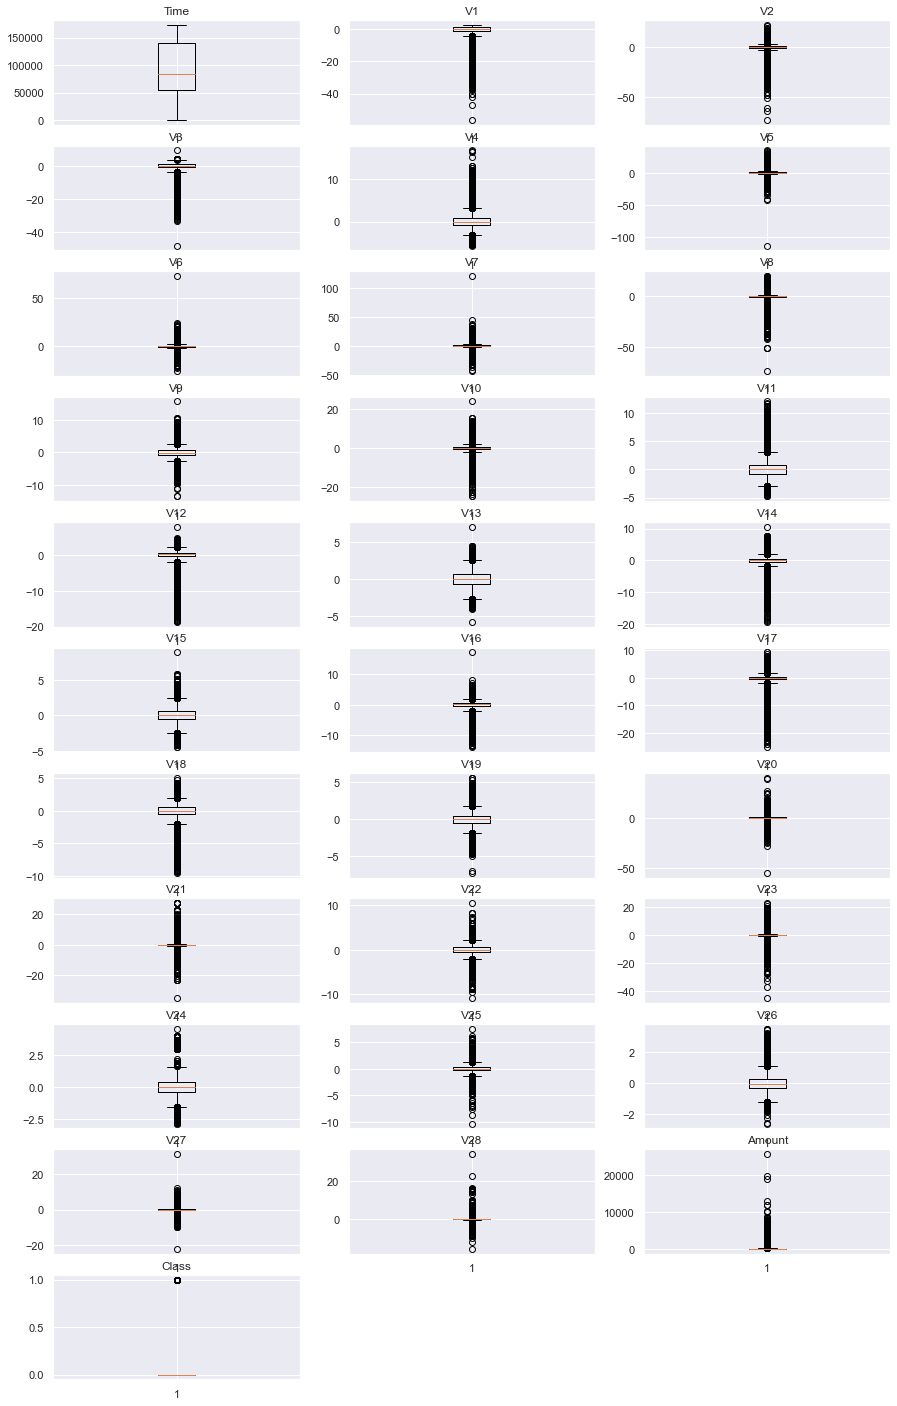

In [15]:
# Checking for the Outliers in the dataset
plt.figure(figsize = (15,25))
count = 1
for col in data:
    plt.subplot(11,3,count)
    plt.boxplot(data[col])
    plt.title(col)
    count += 1
plt.show()


In [16]:
data_corr = data.corr() 

In [17]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))

There are only 492  frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [18]:
print("The accuracy of the classifier then would be : {} which is the number of good classification over the number of tuple to classify".format(str((number_no_fraud)/(number_fraud+number_no_fraud))))

The accuracy of the classifier then would be : 0.9982725143693799 which is the number of good classification over the number of tuple to classify


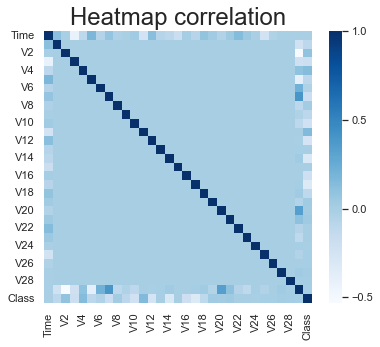

In [19]:
plt.figure(figsize=(6,5))
sns.heatmap(data_corr, cmap='Blues') 
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

# Feature Selection

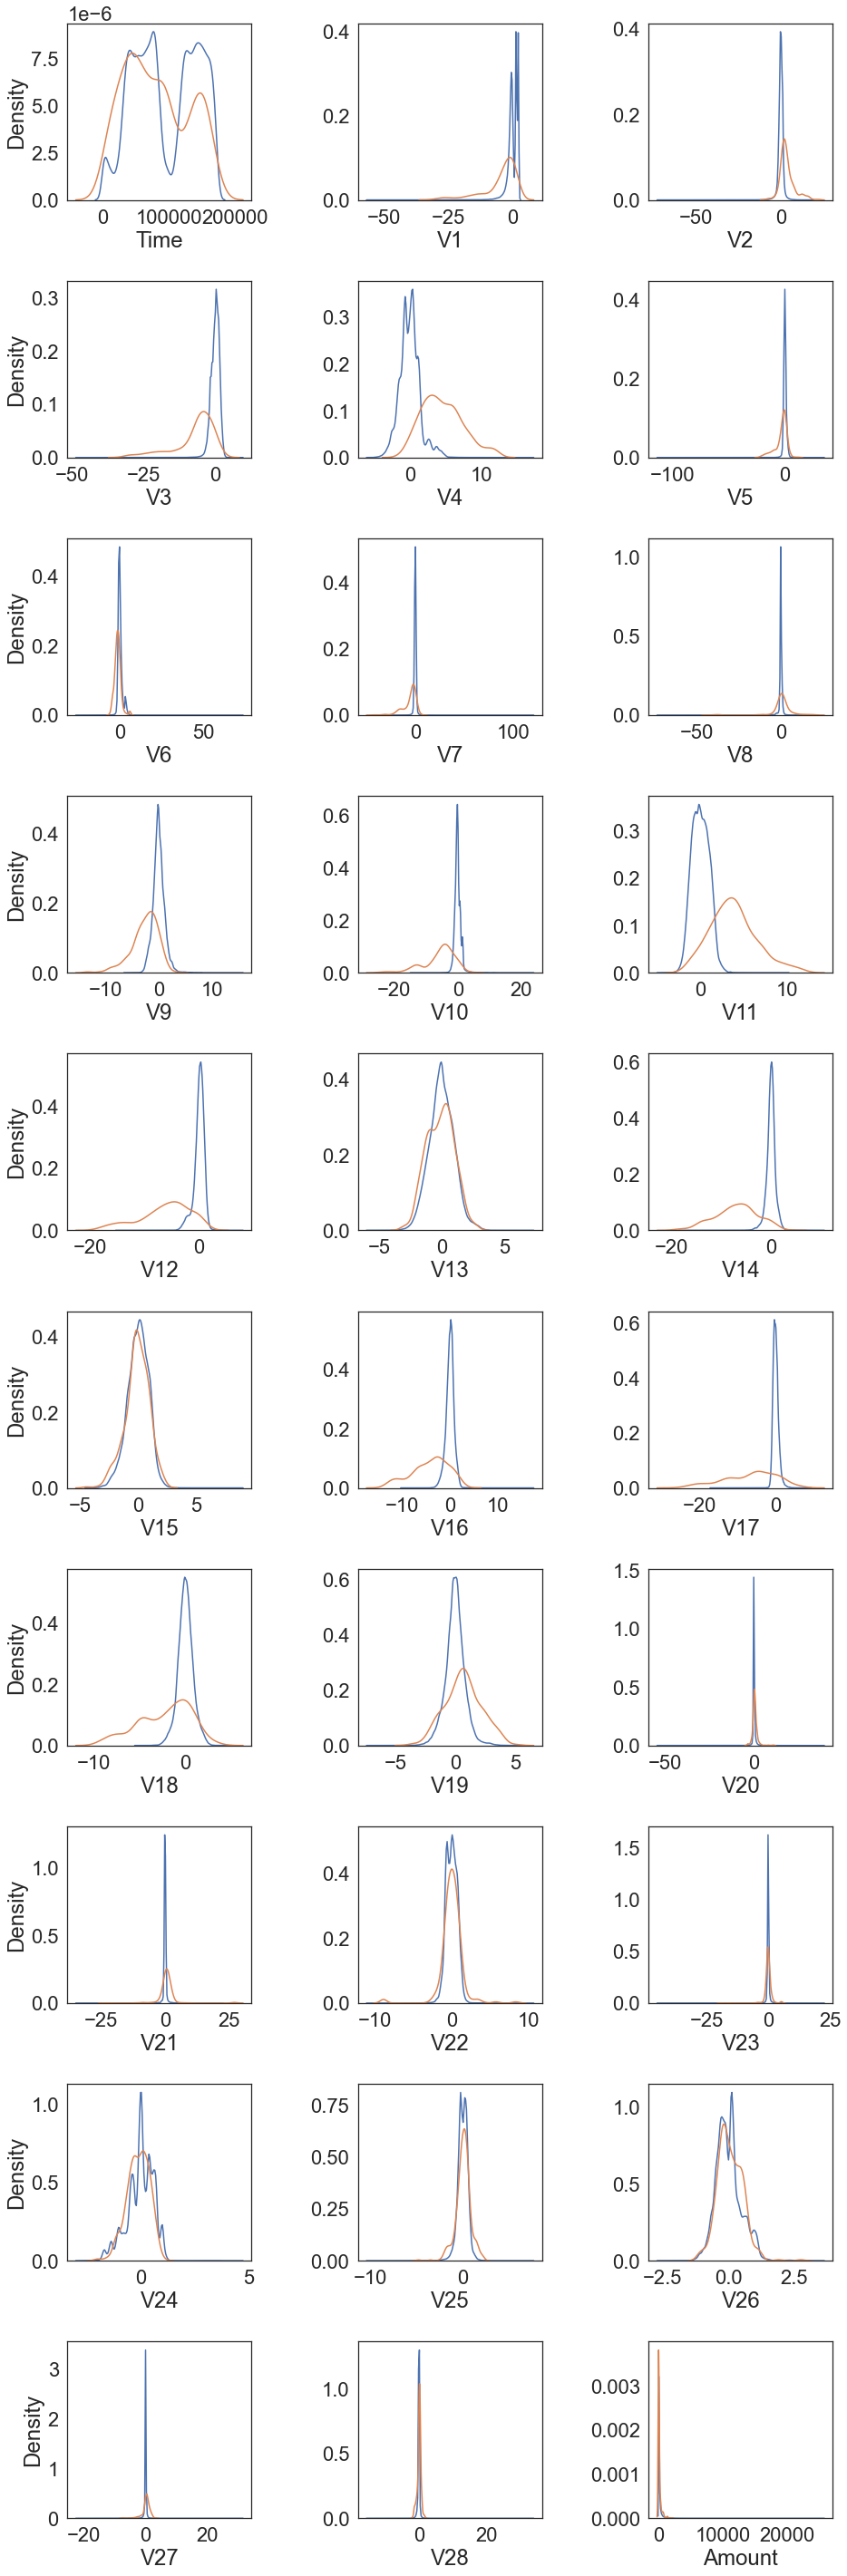

In [20]:
#Comparison of feature distributions for different target classes
X, y = data.drop('Class', axis = 1), data['Class']
data_0, data_1 = data[data['Class'] == 0], data[data['Class'] == 1]
cols, ncols = list(X.columns), 3
nrows = math.ceil(len(cols) / ncols)
fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(data_0[cols[i]], ax = ax[i // ncols, i % ncols])
    sns.kdeplot(data_1[cols[i]], ax = ax[i // ncols, i % ncols])
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()


In [21]:
# Feature selection
cols = ['V4', 'V10','V11', 'V12', 'V14', 'V16', 'V17', 'V18']
data1=data[cols]
data1.head()

,V4,V10,V11,V12,V14,V16,V17,V18
0,1.378155,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.448154,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,0.379780,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,-0.863291,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,0.403034,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


# Undersampling

In [22]:
data= pd.concat([data1,y],axis=1)
data_train_all = data[0:187000] # dividing the dataset into two parts
data_train_1 = data_train_all[data_train_all['Class'] == 1] # Fraud
data_train_0 = data_train_all[data_train_all['Class'] == 0] # Non Fraud
print('In this dataset, we have {} frauds so we need to take a similar number of non-fraud'.format(len(data_train_1)))

data_sample=data_train_0.sample(300) # No Fraud
data_train = data_train_1.append(data_sample) # We gather the frauds with the no frauds. 
data_train = data_train.sample(frac=1) # Then we mix our dataset




In this dataset, we have 368 frauds so we need to take a similar number of non-fraud


In [23]:
X_train = data_train.drop(['Class'],axis=1) # We drop the features which are useless like Time ,the labels 
y_train = data_train['Class'] # Creating a target class
X_train.head()

,V4,V10,V11,V12,V14,V16,V17,V18
151011,8.046075,-17.141514,5.902400,-13.580147,-8.334763,-10.196334,-17.270985,-7.079096
22286,-1.501450,-1.168356,1.350500,1.789118,-0.126877,-0.498326,-0.195393,0.317330
50582,1.620870,-0.167617,0.548763,0.198276,0.863393,0.029419,-0.367143,0.483562
40172,1.473020,1.307418,0.844919,0.385454,-2.168608,-1.326131,-0.209295,-0.038678
68067,0.847753,-0.150129,1.172355,-0.795988,0.578869,0.013467,-0.119204,0.826814


In [24]:
data_test = data[187000:]
X_test = data_test.drop(['Class'],axis=1)
y_test = data_test['Class']
y_test.unique()

array([0, 1], dtype=int64)

# SVM

In [25]:
class_names=np.array(['0','1']) # Binary label
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Training model

In [26]:
data_train= data [:187000]
X_train = data_train.drop(['Class'],axis=1) # We drop the features which are useless like Time ,the labels 
y_train = data_train['Class'] # Creating a target class
X_train.head()

,V4,V10,V11,V12,V14,V16,V17,V18
0,1.378155,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.448154,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,0.379780,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,-0.863291,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,0.403034,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


In [27]:
classifier = svm.SVC(kernel='linear') 
classifier.fit(X_train, y_train)

SVC(kernel='linear')

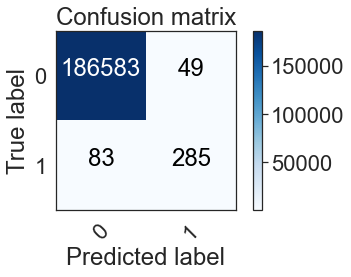

In [28]:
prediction_SVM = classifier.predict(X_train)
cm = confusion_matrix(y_train, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [29]:
print('We have detected {} frauds / {} total frauds.'.format(str(cm[1][1]),str(cm[1][1]+cm[1][0])))
print('\nSo, the probability to detect a fraud is {}'.format(str(cm[1][1]/(cm[1][1]+cm[1][0]))))
print("the accuracy is : {}".format(str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])))))

We have detected 285 frauds / 368 total frauds.

So, the probability to detect a fraud is 0.7744565217391305
the accuracy is : 0.9992941176470588


We have detected 68 frauds / 124 total frauds.
Probability to detect a fraud is 0.5483870967741935
the accuracy is : 0.9994069954093265 


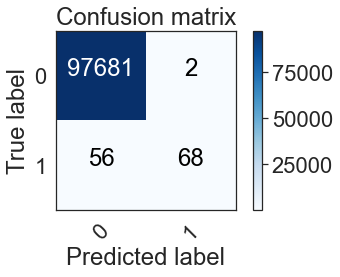

In [30]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})
#In this previously used SVM model, the weigh of each class was the same, which means that missing a fraud is as bad as misjudging a non-fraud. The objective, for a bank, is to maximize the number of detected frauds! Even if it means considering more non-fraud tuple as fraudulent operation.Thus, we need to minimize the False positives i.e, the number of non detected frauds.
classifier_b.fit(X_train, y_train) # Then we train our model, with our balanced data train.

prediction_SVM_test = classifier.predict(X_test) #We predict the test data set.
cm_test = confusion_matrix(y_test, prediction_SVM_test)
plot_confusion_matrix(cm_test,class_names)
print('We have detected {} frauds / {} total frauds.'.format((cm_test[1][1]) ,(cm_test[1][1]+cm_test[1][0])))
print('Probability to detect a fraud is {}'.format(cm_test[1][1]/(cm_test[1][1]+cm_test[1][0])))
print("the accuracy is : {} ".format((cm_test[0][0]+cm_test[1][1]) / (sum(cm_test[0]) + sum(cm_test[1]))))

In [91]:
print(classification_report(y_test,prediction_SVM_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     97683
           1       0.97      0.55      0.70       124

    accuracy                           1.00     97807
   macro avg       0.99      0.77      0.85     97807
weighted avg       1.00      1.00      1.00     97807



# KNN

In [31]:
#normalize data
X_train = normalize(X_train)
X_test=normalize(X_test)

In [32]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train,y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel()) 

In [117]:
knn_predicted_train_labels=knn.predict(X_train)
knn_accuracy_score_train  = accuracy_score(y_train,knn_predicted_train_labels)
knn_precison_score_train  = precision_score(y_train,knn_predicted_train_labels)
knn_recall_score_train    = recall_score(y_train,knn_predicted_train_labels)
knn_f1_score_train        = f1_score(y_train,knn_predicted_train_labels)
knn_MCC_train             = matthews_corrcoef(y_train,knn_predicted_train_labels)

#printing
print("")
print("K-Nearest Neighbours train")
print("Scores")
print("Accuracy -->",knn_accuracy_score_train)
print("Precison -->",knn_precison_score_train)
print("Recall -->",knn_recall_score_train)
print("F1 -->",knn_f1_score_train)
print("MCC -->",knn_MCC_train)
print(classification_report(y_train,knn_predicted_train_labels))


K-Nearest Neighbours train
Scores
Accuracy --> 0.9992941176470588
Precison --> 0.8554216867469879
Recall --> 0.7717391304347826
F1 --> 0.8114285714285713
MCC --> 0.8121546760667423
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    186632
           1       0.86      0.77      0.81       368

    accuracy                           1.00    187000
   macro avg       0.93      0.89      0.91    187000
weighted avg       1.00      1.00      1.00    187000



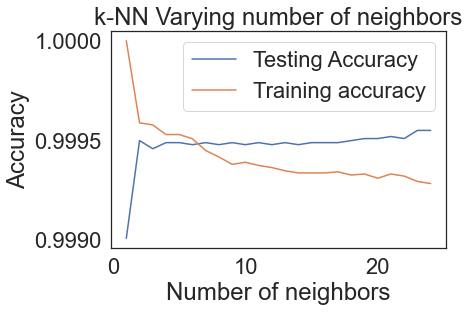

In [33]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

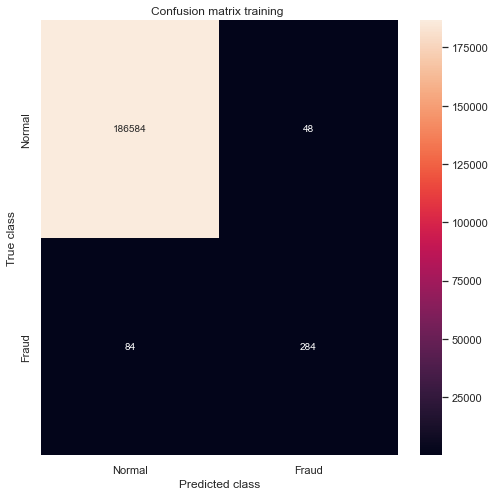

In [121]:
import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix_train = confusion_matrix(y_train, knn_predicted_train_labels)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_train, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix training ")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [34]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [35]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=23)

In [36]:
# predicting labels for testing set
knn_predicted_test_labels=knn.predict(X_test)

In [118]:
#scoring knn
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(y_test,knn_predicted_test_labels)

#printing
print("")
print("K-Nearest Neighbours test")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)
print(classification_report(y_test,knn_predicted_test_labels))


K-Nearest Neighbours test
Scores
Accuracy --> 0.9995501344484546
Precison --> 0.8846153846153846
Recall --> 0.7419354838709677
F1 --> 0.8070175438596492
MCC --> 0.8099233981052685
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     97683
           1       0.88      0.74      0.81       124

    accuracy                           1.00     97807
   macro avg       0.94      0.87      0.90     97807
weighted avg       1.00      1.00      1.00     97807



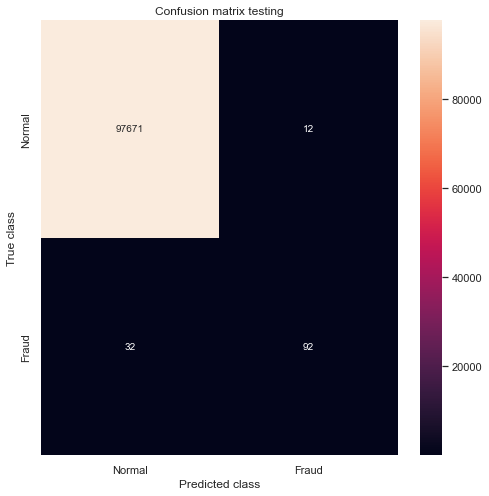

In [122]:
import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, knn_predicted_test_labels)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix testing")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


# ANN

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train1= pd.DataFrame (X_train)
X_test1= pd.DataFrame(X_test)
X_train1[X_train1.columns] = sc.fit_transform(X_train1)
X_test1[X_test1.columns] = sc.transform(X_test1)

In [ ]:

pip install tensorflow

In [59]:
# Let's create the ANN model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [49]:
# Initializing the ANN
model = Sequential()

In [64]:
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=(X_train.shape[1])))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    validation_data=(X_test, y_test), 
                    callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 64)                576       
                                                                 
 dense_71 (Dense)            (None, 32)                2080      
                                                                 
 dense_72 (Dense)            (None, 16)                528       
                                                                 
 dense_73 (Dense)            (None, 8)                 136       
                                                                 
 dense_74 (Dense)            (None, 4)                 36        
                                                                 
 dense_75 (Dense)            (None, 2)                 10        
                                                                 
 dense_76 (Dense)            (None, 1)               

In [65]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 64)                576       
                                                                 
 dense_71 (Dense)            (None, 32)                2080      
                                                                 
 dense_72 (Dense)            (None, 16)                528       
                                                                 
 dense_73 (Dense)            (None, 8)                 136       
                                                                 
 dense_74 (Dense)            (None, 4)                 36        
                                                                 
 dense_75 (Dense)            (None, 2)                 10        
                                                                 
 dense_76 (Dense)            (None, 1)               

In [81]:
predictions = model.predict(X_test)
ap_score = average_precision_score(y_test, predictions)
print("The model test average precision score is {}.".format(ap_score))

3057/3057 [==============================] - 3s 894us/step
The model test average precision score is 0.7608246045553685.


In [112]:
training = model.predict(X_train)
ap_score_train = average_precision_score(y_train, training)
print("The model train average precision score is {}.".format(ap_score_train))

5844/5844 [==============================] - 7s 1ms/step
The model train average precision score is 0.7476972385356792.


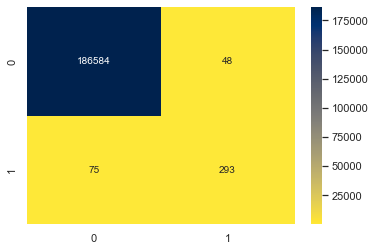

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    186632
           1       0.86      0.80      0.83       368

    accuracy                           1.00    187000
   macro avg       0.93      0.90      0.91    187000
weighted avg       1.00      1.00      1.00    187000



In [114]:
y_train = pd.DataFrame(y_train)
cm_ann_train = confusion_matrix(y_train, training.round())
sns.heatmap(cm_ann_train, annot=True, fmt='.0f', cmap='cividis_r')
plt.show()
print(classification_report(y_train, training.round()))

In [115]:
train_results = model.evaluate(X_train, y_train)
print("The model train accuracy is {}.".format(train_results[1]))

5844/5844 [==============================] - 6s 984us/step - loss: 0.0034 - accuracy: 0.9993
The model train accuracy is 0.9993422627449036.


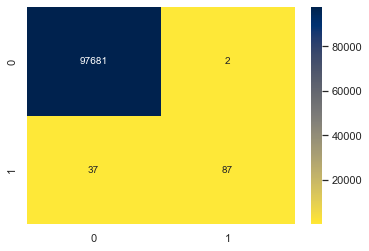

In [106]:
y_test = pd.DataFrame(y_test)
cm_ann = confusion_matrix(y_test, predictions.round())
sns.heatmap(cm_ann, annot=True, fmt='.0f', cmap='cividis_r')
plt.show()

In [108]:
print(classification_report(y_test, predictions.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     97683
           1       0.98      0.70      0.82       124

    accuracy                           1.00     97807
   macro avg       0.99      0.85      0.91     97807
weighted avg       1.00      1.00      1.00     97807



In [67]:
test_results = model.evaluate(X_test, y_test)
print("The model test accuracy is {}.".format(test_results[1]))

3057/3057 [==============================] - 3s 999us/step - loss: 0.0029 - accuracy: 0.9996
The model test accuracy is 0.9996012449264526.


# LR


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [127]:
lrn = LogisticRegression()

lrn.fit(X_train, y_train)


LogisticRegression()


Logistic Regression train
Scores
Accuracy --> 0.9992566844919786
Precison --> 0.829971181556196
Recall --> 0.782608695652174
F1 --> 0.8055944055944056
MCC --> 0.8055712210173999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    186632
           1       0.83      0.78      0.81       368

    accuracy                           1.00    187000
   macro avg       0.91      0.89      0.90    187000
weighted avg       1.00      1.00      1.00    187000



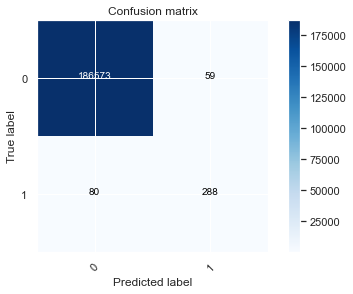

In [125]:
lrn_predicted_train_labels= lrn.predict(X_train)
lrn_accuracy_score_train  = accuracy_score(y_train,lrn_predicted_train_labels)
lrn_precison_score_train  = precision_score(y_train,lrn_predicted_train_labels)
lrn_recall_score_train    = recall_score(y_train,lrn_predicted_train_labels)
lrn_f1_score_train        = f1_score(y_train,lrn_predicted_train_labels)
lrn_MCC_train             = matthews_corrcoef(y_train,lrn_predicted_train_labels)

#printing
print("")
print("Logistic Regression train")
print("Scores")
print("Accuracy -->",lrn_accuracy_score_train)
print("Precison -->",lrn_precison_score_train)
print("Recall -->",lrn_recall_score_train)
print("F1 -->",lrn_f1_score_train)
print("MCC -->",lrn_MCC_train)
print(classification_report(y_train,lrn_predicted_train_labels))
cm_lr_train = confusion_matrix(y_train, lrn_predicted_train_labels)
plot_confusion_matrix(cm_lr_train, ['0', '1'], )


Logistic Regression test
Scores
Accuracy --> 0.9995808070996963
Precison --> 0.9662921348314607
Recall --> 0.6935483870967742
F1 --> 0.807511737089202
MCC --> 0.8184564644160296
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     97683
           1       0.97      0.69      0.81       124

    accuracy                           1.00     97807
   macro avg       0.98      0.85      0.90     97807
weighted avg       1.00      1.00      1.00     97807



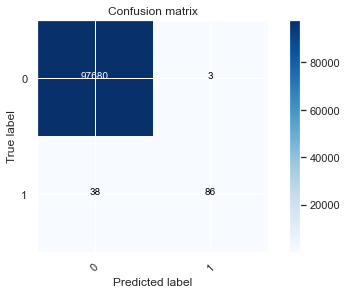

In [126]:
lrn_predicted_test_labels = lrn.predict(X_test)

cm_lr = confusion_matrix(y_test, lrn_predicted_test_labels)
if lrn.classes_[0] == 1:
    cm_lr = np.array([[cm[1,1], cm[1,0]], [cm[0,1], cm[0,0]]])

plot_confusion_matrix(cm_lr, ['0', '1'], )
lrn_accuracy_score_test  = accuracy_score(y_test,lrn_predicted_test_labels)
lrn_precison_score_test  = precision_score(y_test,lrn_predicted_test_labels)
lrn_recall_score_test    = recall_score(y_test,lrn_predicted_test_labels)
lrn_f1_score_test        = f1_score(y_test,lrn_predicted_test_labels)
lrn_MCC_test             = matthews_corrcoef(y_test,lrn_predicted_test_labels)

#printing
print("")
print("Logistic Regression test")
print("Scores")
print("Accuracy -->",lrn_accuracy_score_test)
print("Precison -->",lrn_precison_score_test)
print("Recall -->",lrn_recall_score_test)
print("F1 -->",lrn_f1_score_test)
print("MCC -->",lrn_MCC_test)
print(classification_report(y_test, lrn_predicted_test_labels))

# Comparision ANN and LR

In [128]:
data.head()

,V4,V10,V11,V12,V14,V16,V17,V18,Class
0,1.378155,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,0.448154,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,0.379780,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,-0.863291,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,0.403034,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0


In [130]:
df = data = pd.read_csv('C:/Users/Admin/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [131]:
X1, y1 = df.drop('Class', axis = 1), data['Class']